<a href="https://colab.research.google.com/github/xydeep21/Prediction-of-customer-behavior-by-using-CNN/blob/main/Prediction_of_customer_behavior_by_using_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Scenario

Before purchasing insurances, customers are likely asked to finish a survey. The survey include questions like health conditions, habits, working condition, etc.. Insurance companies will collect and analyze the results to decide whether providing insurance service to one specific customer will be overall beneficial to the company. 

## Dataset Description

**X: Images**

Note: Due to customer privacy concerns, (simulated) participants' real response data is not provided, but instead, we've created images out of the reseponse data. Each participant's response information is captured by one image. You can think of it as a kind of encryption, and this encryption doesn't lose any information.
<br><br>


**Labels: Binary**

Note: `0` means that providing insurance service to this individual will be beneficial to the insurance company, while `1` means the opposite.

## File Description

```
Data/
├─ images/
│  ├─ 0a6a24e7ef.png
│  ├─ 0a7f251b0c.png
│  ├─ ...
├─ train.xlsx
├─ predict_me.xlsx
```
`train.xlsx`: Training data (shape: [900, 2]) has two columns `images` (file names) and `Class` (labels). <br>
`predict_me.xlsx`: One of your submission files. It has two columns `images` (file names) and `Class` (probability of `Class = 1`, empty, you need to fill in the cells). <br>
`images/`: `Data/images/` contains 1000 `.png` files. 900 of them are labeled as in `train.xlsx`, and 100 of them are not labeled as in `predict_me.xlsx`.


##Task

Build whatever model that you deem essential to predict the **probablility** of `Class = 1` for each image file in `predict_me.xlsx`. 

Note: Only fill in the `100` empty cells correspondingly in the second column, <font color="red">don't</font> change other cells.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Load the libraries.

In [129]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Dropout, MaxPooling2D, Flatten
from tensorflow.keras.callbacks import EarlyStopping, Callback
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

Load the data.

In [130]:
df = pd.read_excel('/content/drive/MyDrive/565E Bonus/Data/train.xlsx')
df.head()

,images,Class
0,002d89f686.png,0
1,007607aec7.png,1
2,00993a2218.png,1
3,00cf013b32.png,1
4,0120f13070.png,0


In [131]:
test_df = pd.read_excel('/content/drive/MyDrive/565E Bonus/Data/predict_me.xlsx')

In [132]:
df['Class'].value_counts()

0    679
1    221
Name: Class, dtype: int64

The if the "class" is "binary" the model need y_col is a string.

In [133]:
df['Class'] = df['Class'].astype(str)

Split the data.

In [134]:
train_df, validation_df = train_test_split(df,test_size=0.2,random_state=0)
print(train_df.shape,validation_df.shape,test_df.shape)

(720, 2) (180, 2) (100, 2)


Generate the pictures that the model need.

In [135]:
target_size = (128, 256)

## 1./255 for standardization
train_datagen = ImageDataGenerator(rescale=1./255)
train_gen = train_datagen.flow_from_dataframe(train_df,
                        directory="/content/drive/MyDrive/565E Bonus/Data/images",
                        target_size=target_size,
                        class_mode="binary",
                        x_col="images",
                        y_col="Class",
                        shuffle=True)

val_datagen = ImageDataGenerator(rescale=1./255)
val_gen = val_datagen.flow_from_dataframe(validation_df,
                     directory="/content/drive/MyDrive/565E Bonus/Data/images",
                        target_size=target_size,
                        class_mode="binary",
                        x_col="images",
                        y_col="Class",
                        shuffle=True)

test_datagen = ImageDataGenerator(rescale=1./255)
test_gen = test_datagen.flow_from_dataframe(test_df,
                      directory="/content/drive/MyDrive/565E Bonus/Data/images",
                      target_size=target_size,
                      class_mode=None,
                      x_col="images",
                      y_col=None,
                      shuffle=False)

Found 720 validated image filenames belonging to 2 classes.
Found 180 validated image filenames belonging to 2 classes.
Found 100 validated image filenames.


Build the model.

In [136]:
model=Sequential()
## Define Convolutional layer & Pooling layer
model.add(Conv2D(64, 3,input_shape=(128,256,3),activation="relu"))
model.add(MaxPooling2D(2))
## Flatten all the inputs and build CNN
model.add(Flatten())
## Add Dropout layer, randomly drops 50% neurons from propagation.
model.add(Dropout(0.5))                                                        
model.add(Dense(64,activation="relu", kernel_regularizer="l2"))
model.add(Dense(16,activation="relu"))
model.add(Dense(1,activation="sigmoid"))
model.compile(loss="binary_crossentropy",
              optimizer="adam",
              metrics=['acc'])

In [137]:
## Using earlystopping in this model
Es=EarlyStopping(monitor='val_loss', patience=2,restore_best_weights=True) 

Fit the model.

In [138]:
history=model.fit(train_gen,
      steps_per_epoch=train_gen.n//train_gen.batch_size,
      epochs=5,
      validation_data=val_gen,
      validation_steps=val_gen.n//val_gen.batch_size,
      callbacks=[Es])  

Epoch 1/5
22/22 [==============================] - 29s 1s/step - loss: 5.2605 - acc: 0.6599 - val_loss: 2.8424 - val_acc: 0.9688
Epoch 2/5
22/22 [==============================] - 31s 1s/step - loss: 2.2821 - acc: 0.8110 - val_loss: 1.7185 - val_acc: 0.9750
Epoch 3/5
22/22 [==============================] - 28s 1s/step - loss: 1.3211 - acc: 0.9564 - val_loss: 0.9249 - val_acc: 1.0000
Epoch 4/5
22/22 [==============================] - 28s 1s/step - loss: 0.7518 - acc: 0.9913 - val_loss: 0.5599 - val_acc: 1.0000
Epoch 5/5
22/22 [==============================] - 28s 1s/step - loss: 0.4629 - acc: 1.0000 - val_loss: 0.3693 - val_acc: 1.0000


Plot the val_acc and acc.

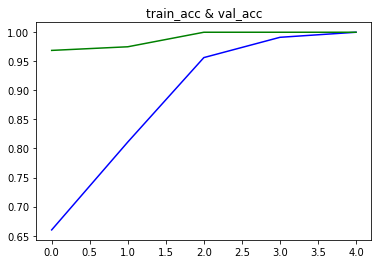

In [139]:
plt.plot(history.history['acc'], color='b')
plt.plot(history.history['val_acc'], color='g')
plt.title("train_acc & val_acc")
plt.show()

In [140]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 126, 254, 64)      1792      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 63, 127, 64)       0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 512064)            0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 512064)            0         
_________________________________________________________________
dense_15 (Dense)             (None, 64)                32772160  
_________________________________________________________________
dense_16 (Dense)             (None, 16)                1040      
_________________________________________________________________
dense_17 (Dense)             (None, 1)                

Making prediction.

In [141]:
test_set.head()

,images,Class
0,01f92a18a2.png,nan
1,027c10fb80.png,nan
2,052a1ec3a3.png,nan
3,0672234ede.png,nan
4,0b3fa303fd.png,nan


In [149]:
test_gen.reset()
pred = model.predict_generator(test_gen,verbose=1)

4/4 [==============================] - 1s 169ms/step


In [152]:
test_df['Class']=pred

In [153]:
test_df.head()

,images,Class
0,01f92a18a2.png,0.013167
1,027c10fb80.png,0.735988
2,052a1ec3a3.png,0.050826
3,0672234ede.png,0.021616
4,0b3fa303fd.png,0.876569


In [154]:
test_df.to_excel('/content/drive/MyDrive/565E Bonus/Data/test_result.xlsx')